cluster
1.0     96
12.0    95
3.0     91
5.0     89
10.0    85
7.0     79
6.0     74
9.0     73
4.0     72
8.0     70
2.0     69
11.0    60
NaN     50
Name: count, dtype: int64


C:\Users\ahmed\AppData\Local\Temp\ipykernel_16580\2019692265.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cl12.loc[np.random.choice(cl12.index, size=50, replace=False)] = np.nan  # Randomly set some values to NA


<Figure size 1000x600 with 0 Axes>

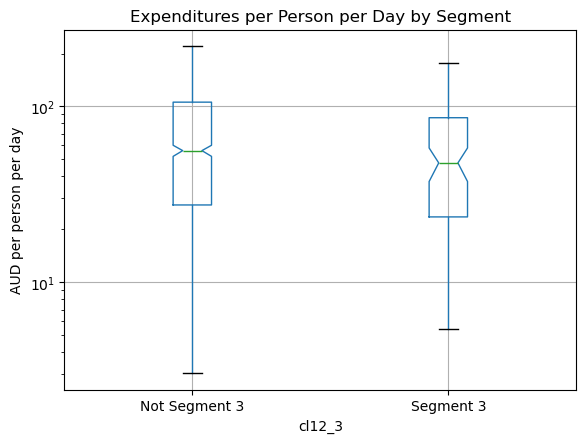

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer

# Load the data
file_path = 'ausActiv_segmentation_variables.csv'
data = pd.read_csv(file_path)

# For demonstration, let's assume we have 12 clusters
# Normally, you would obtain these from a biclustering algorithm
n_clusters = 12
np.random.seed(42)  # For reproducibility
data['cluster'] = np.random.choice(range(1, n_clusters + 1), size=len(data))

# Create segment membership vector (with some NAs for unassigned clusters)
cl12 = data['cluster']
cl12.loc[np.random.choice(cl12.index, size=50, replace=False)] = np.nan  # Randomly set some values to NA

# Tabulate the segment membership
print(cl12.value_counts(dropna=False))

# Create binary variable for Segment 3
cl12_3 = cl12 == 3
data['cl12_3'] = cl12_3.map({True: 'Segment 3', False: 'Not Segment 3'})

# Load additional information (simulated for this example)
# In actual practice, you would load the 'ausActivDesc' data
# Here we assume 'spendpppd' column exists in data
data['spendpppd'] = np.random.lognormal(mean=4, sigma=1, size=len(data))

# Boxplot of spend per person per day
plt.figure(figsize=(10, 6))
data.boxplot(column='spendpppd', by='cl12_3', notch=True, showfliers=False)
plt.yscale('log')
plt.ylabel('AUD per person per day')
plt.title('Expenditures per Person per Day by Segment')
plt.suptitle('')
plt.show()


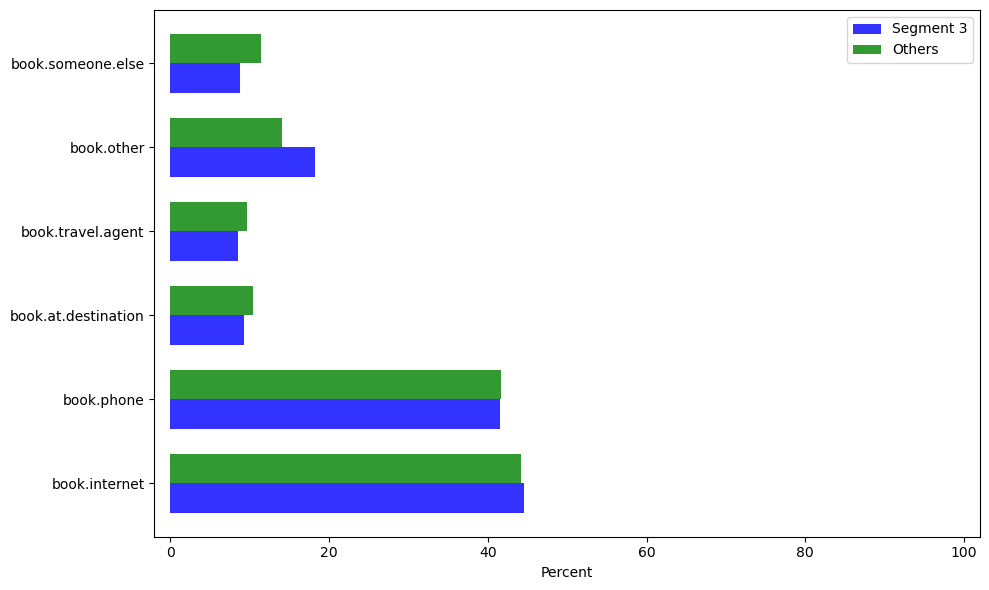

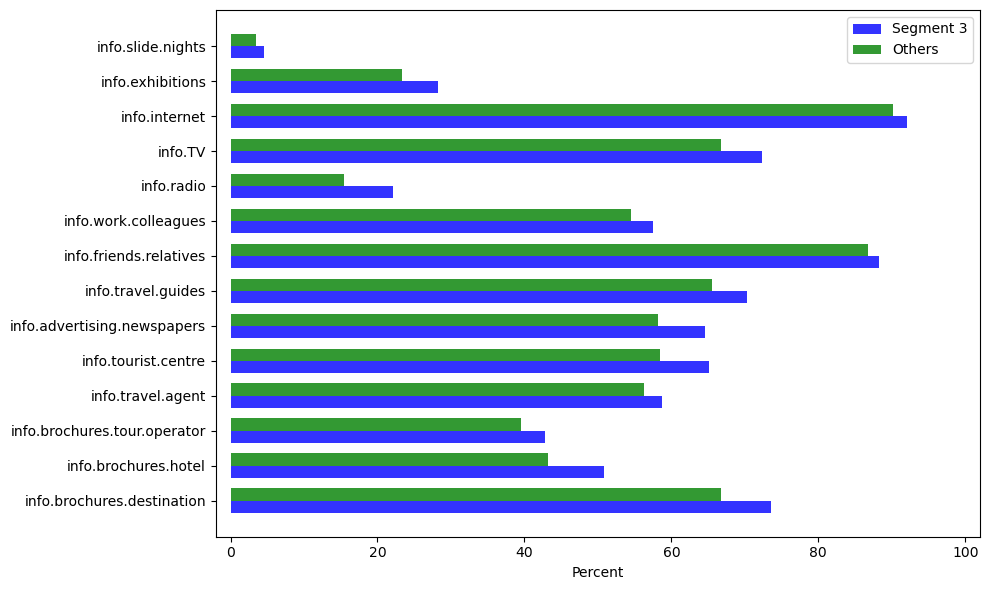

<Figure size 1200x800 with 0 Axes>

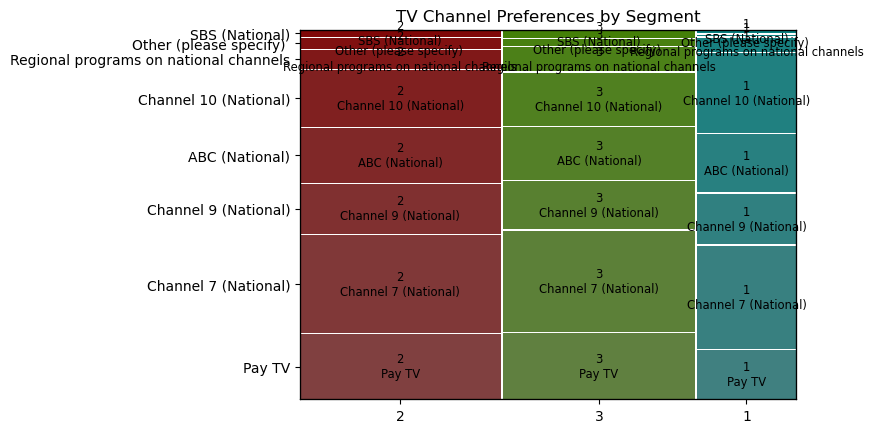

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

# Load your data
file_path = 'ausActivDescriptor_variables.csv'
ausActivDesc = pd.read_csv(file_path)

# Adding a hypothetical 'segment' column with random segment assignments for demonstration
np.random.seed(0)  # for reproducibility
ausActivDesc['segment'] = np.random.choice([1, 2, 3], size=len(ausActivDesc), p=[0.2, 0.4, 0.4])

# Define a function to plot proportional bar charts
def prop_barchart(data, columns, segment_column='segment', segment_value=3, layout=(1, 1), xlab="Percent", xlim=(-2, 102)):
    # Filter data for the specified segment
    data_segment = data[data[segment_column] == segment_value]
    data_others = data[data[segment_column] != segment_value]
    
    # Calculate the proportions
    prop_segment = data_segment[columns].mean() * 100
    prop_others = data_others[columns].mean() * 100
    
    # Plotting
    fig, ax = plt.subplots(figsize=(10, 6))
    index = np.arange(len(columns))
    bar_width = 0.35
    opacity = 0.8

    bar1 = plt.barh(index, prop_segment, bar_width,
                    alpha=opacity,
                    color='b',
                    label=f'Segment {segment_value}')

    bar2 = plt.barh(index + bar_width, prop_others, bar_width,
                    alpha=opacity,
                    color='g',
                    label='Others')

    plt.xlabel(xlab)
    plt.xlim(xlim)
    plt.yticks(index + bar_width / 2, columns)
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot booking behavior
booking_columns = ausActivDesc.columns[ausActivDesc.columns.str.startswith("book")]
prop_barchart(ausActivDesc, booking_columns, segment_column='segment', segment_value=3)

# Plot information sources
info_columns = ausActivDesc.columns[ausActivDesc.columns.str.startswith("info")]
prop_barchart(ausActivDesc, info_columns, segment_column='segment', segment_value=3)

# Generate a mosaic plot for TV channel preferences
# Crosstab of TV.channel by segment
tv_channel_crosstab = pd.crosstab(ausActivDesc['TV.channel'], ausActivDesc['segment'])

# Plotting the mosaic plot
plt.figure(figsize=(12, 8))
mosaic(ausActivDesc, ['segment', 'TV.channel'], title="TV Channel Preferences by Segment")
plt.show()
